In [4]:
import pandas as pd

path="/home/mdantoniazzi/pessoal/engenharia-dados/pipeline_analise_sentimento_mercado"

# Carregando os parquets que o extract.py gerou
df_orders = pd.read_parquet(f"{path}/data/silver/orders.parquet")
df_items = pd.read_parquet(f"{path}/data/silver/order_items.parquet")

print(f"Pedidos: {df_orders.shape}")
print(f"Itens: {df_items.shape}")

Pedidos: (99441, 8)
Itens: (112650, 7)


In [7]:
df_orders.info()

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   order_id                       99441 non-null  str  
 1   customer_id                    99441 non-null  str  
 2   order_status                   99441 non-null  str  
 3   order_purchase_timestamp       99441 non-null  str  
 4   order_approved_at              99281 non-null  str  
 5   order_delivered_carrier_date   97658 non-null  str  
 6   order_delivered_customer_date  96476 non-null  str  
 7   order_estimated_delivery_date  99441 non-null  str  
dtypes: str(8)
memory usage: 21.9 MB


In [5]:
# O problema das datas
print(df_orders[['order_purchase_timestamp']].info())

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   order_purchase_timestamp  99441 non-null  str  
dtypes: str(1)
memory usage: 2.6 MB
None


In [ ]:
# Solução de conversão
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])

# Diferença é que agora podemos extrair informações temporais
df_orders['mes_compra'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['dia_semana'] = df_orders['order_purchase_timestamp'].dt.day_name()

df_orders[['order_purchase_timestamp', 'mes_compra', 'dia_semana']].head()


,order_purchase_timestamp,mes_compra,dia_semana
0,2017-10-02 10:56:33,10,Monday
1,2018-07-24 20:41:37,7,Tuesday
2,2018-08-08 08:38:49,8,Wednesday
3,2017-11-18 19:28:06,11,Saturday
4,2018-02-13 21:18:39,2,Tuesday


In [11]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# visualizar o arquivo parquet criado na camada gold
# Lendo o arquivo final que foi processado
df_gold = pd.read_parquet(f"{path}/data/gold/fact_orders.parquet")

print(f"Total de registros na Gold: {len(df_gold)}")
df_gold.head()

Total de registros na Gold: 110197


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,freight_value,total_item_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,28.62


In [18]:
# Verificando faturamento
faturamento_total = df_gold['total_item_value'].sum()
print(f"Faturamento Total (Entregues): R$ {faturamento_total:,.2f}")

# Média de gasto por pedido
ticket_medio = df_gold.groupby('order_id')['total_item_value'].sum().mean()
print(f"Ticket Médio por Pedido: R$ {ticket_medio:.2f}")

Faturamento Total (Entregues): R$ 15,419,773.75
Ticket Médio por Pedido: R$ 159.83


<Axes: title={'center': 'Faturamento Mensal (Gold Table)'}, xlabel='order_purchase_timestamp'>

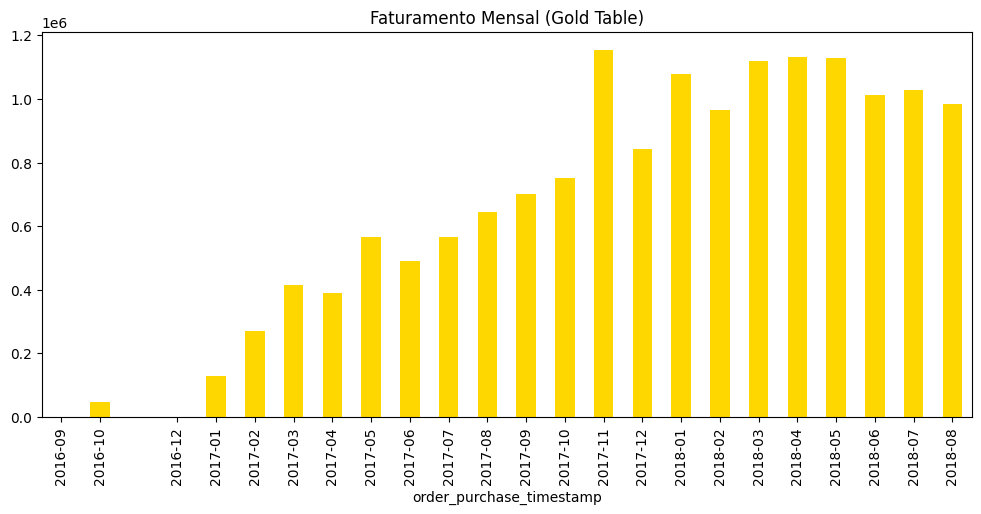

In [20]:
import matplotlib.pyplot as plt

# Evolução das vendas por mês
# Agrupando por mês de compra (usando a coluna que você criou)
vendas_por_mes = df_gold.groupby(df_gold['order_purchase_timestamp'].dt.to_period('M'))['total_item_value'].sum()

# Criando um gráfico simples para conferir a saúde dos dados
vendas_por_mes.plot(kind='bar', title='Faturamento Mensal (Gold Table)', figsize=(12,5), color='gold')

In [21]:
# valores nulos
df_gold.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
product_id                        0
price                             0
freight_value                     0
total_item_value                  0
dtype: int64